# Tasks to be performed on dataset:

1.Get the date and state when we got highest number of patients and deaths.

2.Get State wise death count till date and calculate percentage contribution of each state. Visualise top 10 
3.states based on death counts.

4.Observe the trend of death counts for last 30 days

5.Observe the trend of cured rate for last 30 days

6.Visualise age wise percentage of COVID infections

7.Plot and Visualise total available beds data per state

8.Get the highest count of hospitalisation city wise.

9.Find top 20 cities having hospitalisations till date


# Data Fetching and Basic Understanding 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('covid_19_india.csv')

In [3]:
data.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3


# Data Cleaning

In [5]:
# Drop the Sno nad Time cloumns
data=data.drop(['Sno', 'Time'], axis=1)
data.head(5)

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/20,Kerala,1,0,0.0,0.0,1
1,31/01/20,Kerala,1,0,0.0,0.0,1
2,01/02/20,Kerala,2,0,0.0,0.0,2
3,02/02/20,Kerala,3,0,0.0,0.0,3
4,03/02/20,Kerala,3,0,0.0,0.0,3


In [6]:
data.tail(5)

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2163,21/05/20,Tripura,-,-,133.0,0.0,173
2164,21/05/20,Uttarakhand,-,-,53.0,1.0,122
2165,21/05/20,Uttar Pradesh,-,-,3066.0,127.0,5175
2166,21/05/20,West Bengal,-,-,1136.0,253.0,3103
2167,21/05/20,Cases being reassigned to states,-,-,NaN,NaN,1403


In [7]:
# Replace '-' by zero.
data=data.replace('-',0)
data.tail(5)

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2163,21/05/20,Tripura,0,0,133.0,0.0,173
2164,21/05/20,Uttarakhand,0,0,53.0,1.0,122
2165,21/05/20,Uttar Pradesh,0,0,3066.0,127.0,5175
2166,21/05/20,West Bengal,0,0,1136.0,253.0,3103
2167,21/05/20,Cases being reassigned to states,0,0,NaN,NaN,1403


Remove the Last row where State is not mentioned yet...

In [ ]:
data = data[data['State/UnionTerritory'] != 'Cases being reassigned to states']
data.tail(5)

In [9]:
data.dtypes

Date                         object
State/UnionTerritory         object
ConfirmedIndianNational      object
ConfirmedForeignNational     object
Cured                       float64
Deaths                      float64
Confirmed                     int64
dtype: object

In [10]:
data['ConfirmedIndianNational']=data['ConfirmedIndianNational'].astype(int)

In [11]:
data.dtypes

Date                         object
State/UnionTerritory         object
ConfirmedIndianNational       int64
ConfirmedForeignNational     object
Cured                       float64
Deaths                      float64
Confirmed                     int64
dtype: object

# Data Prepration

#### Get the date and state at which we got highest number of ConfirmedIndianNational

In [13]:
higest_indian_cases=data[data['ConfirmedIndianNational'] == data['ConfirmedIndianNational'].max()]

In [14]:
higest_indian_cases

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
434,28/03/20,Maharashtra,177,3,25.0,5.0,180


#### Get the date and state at which we got highest number of Deaths

In [16]:
higest_deaths=data[data['Deaths'] == data['Deaths'].max()]

In [17]:
higest_deaths

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2153,21/05/20,Maharashtra,0,0,10318.0,1390.0,39297


In [18]:
# Get state wise death count till date.

In [19]:
death_count_data = data[['State/UnionTerritory', 'Deaths']].groupby(['State/UnionTerritory']).agg(death_count=('Deaths','sum'))

In [20]:
death_count_data.head(5)

,death_count
State/UnionTerritory,
Andaman and Nicobar Islands,0.0
Andhra Pradesh,1326.0
Arunachal Pradesh,0.0
Assam,57.0
Bihar,175.0


# Visualization of results

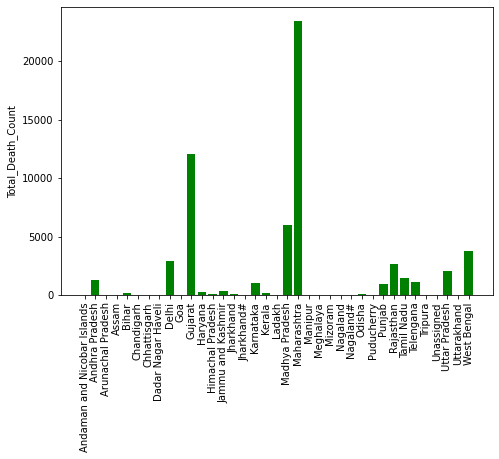

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
states = death_count_data.index
death_counts = death_count_data['death_count']
ax.bar(states,death_counts,color='green')
plt.xticks(states, rotation='vertical')
plt.ylabel('Total_Death_Count')
plt.show()

# Data Exploration

In [6]:
def compute_percentage(x):

    """
    This function calculates the percentage contribution of death counts for each state.
    Parameters:
    x (int):each value of a column
    Returns:
    percentage(float):Percentage value of the passed value.
    """
    percentage = float(x/death_count_data['death_count'].sum()) * 100
    percentage = round(percentage, 2)
    return percentage

death_count_data['percentage_contribution'] = death_count_data.apply(compute_percentage, axis=1)

NameError: name 'death_count_data' is not defined

In [23]:
death_count_data=death_count_data.sort_values(by='percentage_contribution', ascending=False)

In [24]:
death_count_data_top_10=death_count_data.head(10)

In [25]:
death_count_data_top_10.head()

,death_count,percentage_contribution
State/UnionTerritory,,
Maharashtra,23451.0,38.93
Gujarat,12029.0,19.97
Madhya Pradesh,6011.0,9.98
West Bengal,3774.0,6.27
Delhi,2946.0,4.89


# Visualization of State wise Contribution

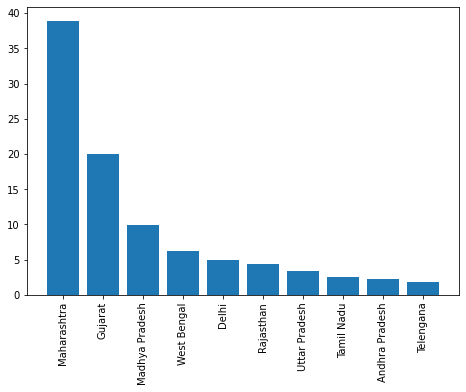

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
states = death_count_data_top_10.index
percentage_contribution = death_count_data_top_10['percentage_contribution']
ax.bar(states,percentage_contribution)
plt.xticks(states, rotation='vertical')
plt.show()

#### Let us try to the date for which we had find highest number of deaths

In [28]:
deaths_per_date=data[['Date', 'Deaths']].groupby(['Date']).agg(death_count=('Deaths','sum'))

In [29]:
deaths_per_date_desc=deaths_per_date.sort_values(by='death_count', ascending=False)
deaths_per_date_desc=deaths_per_date_desc.head(30)

In [30]:
deaths_per_date_desc.head(1)

,death_count
Date,
21/05/20,3435.0


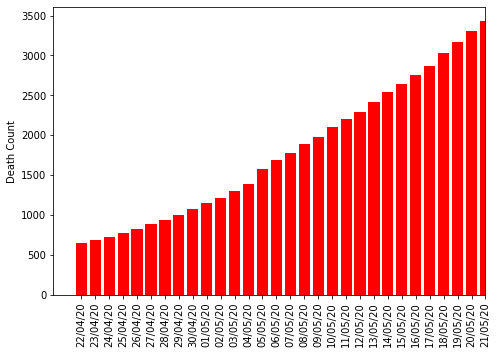

In [31]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
dates = deaths_per_date_desc.index
death_counts = deaths_per_date_desc['death_count']
ax.bar(dates,death_counts,color='red')
plt.xticks(dates, rotation='vertical')
plt.ylabel('Death Count')
plt.xlim(31,0)
plt.show()

In [32]:
cured_per_date=data[['Date', 'Cured']].groupby(['Date']).agg(cured_count=('Cured','sum'))

In [33]:
cured_per_date_desc=cured_per_date.sort_values(by='cured_count', ascending=False)

In [34]:
cured_per_date_desc.head(5)

,cured_count
Date,
21/05/20,45300.0
20/05/20,42298.0
19/05/20,39174.0
18/05/20,36824.0
17/05/20,34109.0


In [35]:
cured_per_date_desc=cured_per_date_desc.head(30)

# Plot the trend

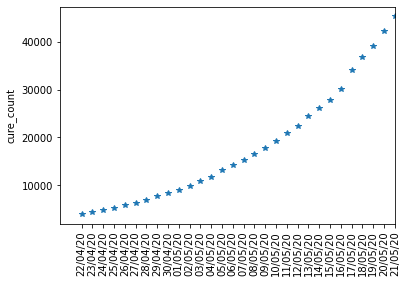

In [36]:
plt.plot(cured_per_date_desc,'*')
plt.xticks(dates, rotation='vertical')
plt.ylabel('cure_count')
plt.xlim(31,0)
plt.show()

# Fetch Age group details data

In [37]:
age_data=pd.read_csv('AgeGroupDetails.csv')

In [38]:
age_data.head(10)

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


# Data Cleaning

In [39]:
age_data=age_data.drop(['Sno','TotalCases'],axis=1)

In [40]:
age_data

,AgeGroup,Percentage
0,0-9,3.18%
1,10-19,3.90%
2,20-29,24.86%
3,30-39,21.10%
4,40-49,16.18%
5,50-59,11.13%
6,60-69,12.86%
7,70-79,4.05%
8,>=80,1.45%
9,Missing,1.30%


In [41]:
age_data['Percentage']=age_data['Percentage'].str.rstrip('%').astype('float')

In [42]:
age_data.head(1)

,AgeGroup,Percentage
0,0-9,3.18


# Visuaization of percentage rate of affecties 

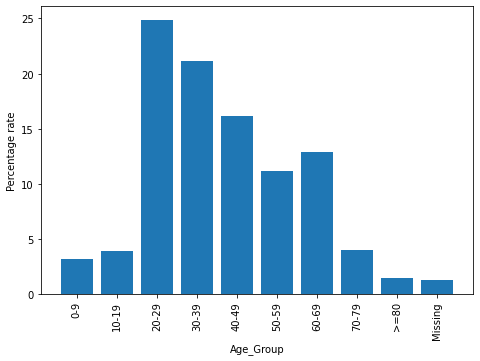

In [43]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
age_group = age_data['AgeGroup']
percentage = age_data['Percentage']
ax.bar(age_group,percentage)
plt.xticks(age_group, rotation='vertical')
plt.ylabel('Percentage rate')
plt.xlabel('Age_Group')
plt.show()

# Fetch the Beds data

In [45]:
beds_data=pd.read_csv('HospitalBedsIndia.csv')

In [46]:
beds_data=beds_data.drop(['Sno'],axis=1)

In [47]:
column_list=list(beds_data.columns)

In [48]:
column_list

['State/UT',
 'NumPrimaryHealthCenters_HMIS',
 'NumCommunityHealthCenters_HMIS',
 'NumSubDistrictHospitals_HMIS',
 'NumDistrictHospitals_HMIS',
 'TotalPublicHealthFacilities_HMIS',
 'NumPublicBeds_HMIS',
 'NumRuralHospitals_NHP18',
 'NumRuralBeds_NHP18',
 'NumUrbanHospitals_NHP18',
 'NumUrbanBeds_NHP18']

In [49]:
beds_data=beds_data.fillna(0)

In [50]:
beds_data.head(2)

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,Andaman & Nicobar Islands,27,4,0.0,3,34,1246,27,575,3,500
1,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658


In [51]:
beds_data = beds_data[beds_data['State/UT'] != 'All India']

#### Let us count total number of beds per state.

In [ ]:
column_list.remove('State/UT')

In [53]:
beds_data["TotalBeds"] = beds_data[column_list].sum(axis=1)

In [54]:
beds_data[['State/UT','TotalBeds']].head()

,State/UT,TotalBeds
0,Andaman & Nicobar Islands,2392.0
1,Andhra Pradesh,86110.0
2,Arunachal Pradesh,5218.0
3,Assam,38916.0
4,Bihar,33133.0


## Visualize the number of beds per state

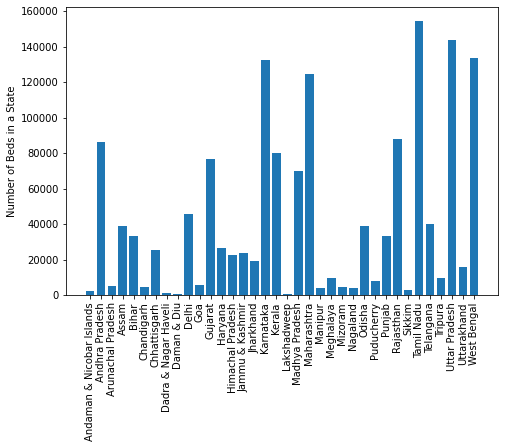

In [55]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
State = beds_data['State/UT']
No_of_Beds = beds_data['TotalBeds']
ax.bar(State,No_of_Beds)
plt.xticks(State, rotation='vertical')
plt.ylabel('Number of Beds in a State')
plt.show()

In [56]:
beds_data=beds_data.sort_values(by='TotalBeds', ascending=False)

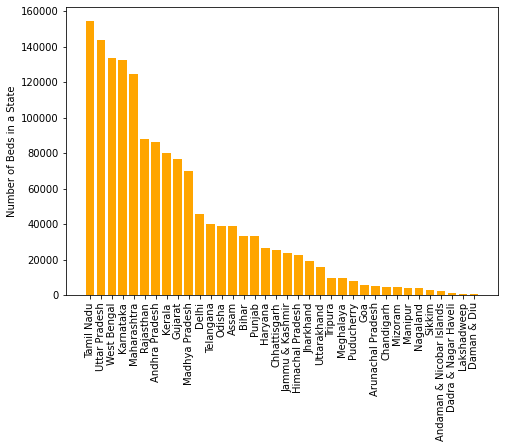

In [57]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
State = beds_data['State/UT']
No_of_Beds = beds_data['TotalBeds']
ax.bar(State,No_of_Beds,color='orange')
plt.xticks(State, rotation='vertical')
plt.ylabel('Number of Beds in a State')
plt.show()

### Let us get the higest count of hospitalization in city.

In [59]:
individual_data=pd.read_csv('IndividualDetails.csv')

In [60]:
individual_data.head(5)

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [61]:
individual_data=individual_data[['id','detected_city','current_status']]

In [62]:
individual_data

,id,detected_city,current_status
0,0,Thrissur,Recovered
1,1,Alappuzha,Recovered
2,2,Kasaragod,Recovered
3,3,East Delhi (Mayur Vihar),Recovered
4,4,Hyderabad,Recovered
...,...,...,...
27885,27886,NaN,Hospitalized
27886,27887,NaN,Hospitalized
27887,27888,NaN,Hospitalized
27888,27889,NaN,Hospitalized


# Data Cleaning

In [63]:
individual_data=individual_data.dropna()

In [64]:
individual_data = individual_data[individual_data['current_status'] != 'Recovered']

In [65]:
individual_data

,id,detected_city,current_status
18,18,Gurugram,Hospitalized
19,19,Gurugram,Hospitalized
21,21,Agra,Hospitalized
26,26,Agra,Hospitalized
28,28,Janakpuri,Hospitalized
...,...,...,...
27440,27441,Lowadih,Hospitalized
27441,27442,Lowadih,Hospitalized
27446,27447,Hindpiri,Hospitalized
27447,27448,Hindpiri,Hospitalized


In [66]:
hospitalization_per_city=individual_data[['detected_city', 'current_status']].groupby(['detected_city']).agg(no_of_hospitalizations=('current_status','count'))

In [67]:
hospitalization_per_city

,no_of_hospitalizations
detected_city,
\n,1
,1
-,2
A-park road,1
Agra,4
...,...
West Delhi,1
West Mambalam,1
Yavatmal,4


In [68]:
hospitalization_per_city_desc=hospitalization_per_city.sort_values(by='no_of_hospitalizations', ascending=False)

#### Filter the results to get top 20 records

In [69]:
hospitalization_per_city_desc_top_20=hospitalization_per_city_desc.head(20)

In [76]:
hospitalization_per_city_desc_top_20.index

Index(['MCGM', 'Thane', 'Navi Mumbai', 'PMC', 'Vasai-Virar', 'Mira-Bhayandar',
       'Nagpur', 'Kalyan-Dombivali', 'Malegaon', 'Pimpri-Chinchwad', 'Mumbai',
       'Pune', 'Thane Rural', 'Nizamuddin area', 'Kasaragod', 'Bengaluru',
       'Jamalpur', 'Panvel', 'Nanjangud', 'Hyderabad'],
      dtype='object', name='detected_city')

## Visualization of hospitalization status per city

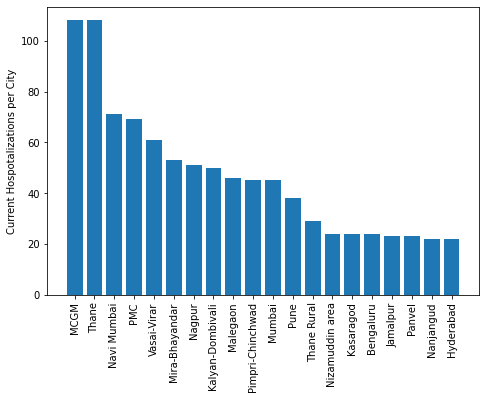

In [72]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
detected_city = hospitalization_per_city_desc_top_20.index
no_of_hospitalizations = hospitalization_per_city_desc_top_20['no_of_hospitalizations']
ax.bar(detected_city,no_of_hospitalizations)
plt.xticks(detected_city, rotation='vertical')
plt.ylabel('Current Hospotalizations per City')
plt.show()